# Lab 06 - Data preprocessing I

Name: Kartikeya Sharma  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2021SP  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Importing) [M]<br/><br/>Penn State has an excellent public database of weather observations collected from a wide range of stations scattered throughout the state. Some of them go back to the 1940s. For this lab, we're going to explore one of those datasets – Williamsport, PA. <br/><br/>Go to the The Pennsylvania State Climatologist at http://climate.met.psu.edu From this page, find their page to download their data (Select Data à then Data Archive). Now you will select a "network". Select FAA Hourly data. You are going to investigate the weather observations Williamsport, PA, whose FAA code is KIPT. Select it.<br/><br/>On the next screen, enter the following:<br/><br/>• Start and End Dates: 2000-01-01 to 2020-12-31.<br/><br/>• Select EVERY attribute to download (from Date/Time, Number of observations... etc... right through MaxWind Speed).<br/><br/>• Output file type should be a CSV file<br/><br/>• Select Yes to include Metadata. (Metadata is information about data. This usually contains valuable information, and you almost always want to retain this information.)<br/><br/>Click **Submit**. Download the data (which will most likely place your data into your Downloads folder.) It'll be a longfilename. That's fine. I usually always add the suffix "_raw" to indicate this is the raw data that I'm working with from my source. Never lose track of your original dataset.<br/><br/>You are not done until you have a data file in your data directory (which should be at the same level as your labs directory.) If you placed the .csv file in the correct place, then your path should be:<br/><br/>*"../data/faa_hourly-KIPT_20000101-20201231_raw.csv"*

Completed.

#### 1) [P] Use pandas to read in your CSV data file you downloaded above. (You should have placed in your data directory.) Call the data frame ```df_temps```. Read in the entire dataset, however, peek at the dataset first. You'll notice 16 rows of metadata. Ignore the first 16 rows (HINT: Use the ```skiprows=```option!)<br/><br/><u>NOTE</u>: ALWAYS BE SURE TO LOOK AT YOUR ACTUAL DATA BEFORE TRYING TO READ IN A RAW DATASET! JUST BECAUSE A DATASET HAS A .CSV EXTENSION DOES NOT MEAN THAT YOU CAN RELY ON EVERY ROW BEING A PROPERLY FORMATTED ROW! **For instance, notice that the header row is scattered throughout your data!** Notice that you have some extra columns at the end that are consistently empty! The inexperienced are tempted to manually edit the file to make it easy to read. NO. WRONG! BAD DATA SCIENTIST! Never change your raw data. <u>**Instead, write your Python cleaning code to always work with raw, uncleaned data.**</u> Why? In practice, your data file may be huge. You may need to repeatedly grab fresh data, that will only have the same issues. Do you really want to repeat your manual editing silliness every time you have a fresh file? No! **It may take a bit more work up front, but ALWAYS strive to write code to preprocess every aspect of your raw data file!** It will always save you work later!

In [2]:
df_temps = pd.read_csv(
    "../data/faa_hourly-KIPT_20000101-20201231_raw.csv",
    skiprows=25)

#### 2) Report the general structure of the data frame using ```df_temps.info()```. You should notice that almost every variable was read in as a plan object data type. You have a lot of work to do!<br/><br/>Your result should look as follows:<br/><br/>*output below matches output in assignment*

In [3]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                181943 non-null  object 
 1   Number of Observations (n/a)   181943 non-null  int64  
 2   Average Temp (F)               180938 non-null  float64
 3   Max Temp (F)                   180938 non-null  float64
 4   Min Temp (F)                   180938 non-null  float64
 5   Average Dewpoint Temp (F)      180816 non-null  float64
 6   1 Hour Precip (in)             30294 non-null   float64
 7   Max Wind Gust (mph)            24708 non-null   float64
 8   Average Relative Humidity (%)  177114 non-null  float64
 9   Average Wind Speed (mph)       181394 non-null  float64
 10  Average Station Pressure (mb)  181647 non-null  float64
 11  Average Wind Direction (deg)   148822 non-null  float64
 12  Max Wind Speed (mph)          

#### 3) [P] Read about the ```memory_usage()``` method of pandas data frames. Then, report the total memory in bytes for each variable of ```df_temps```. Set the parameter ```deep=True```, to get the most accurate assessment of your total memory usage. (NOTE – this could take a bit of time to return an answer.)

In [4]:
df_temps_original_memory = df_temps.memory_usage(deep=True)

display(df_temps_original_memory)

Index                                 128
Date/Time (GMT)                  13827668
Number of Observations (n/a)      1455544
Average Temp (F)                  1455544
Max Temp (F)                      1455544
Min Temp (F)                      1455544
Average Dewpoint Temp (F)         1455544
1 Hour Precip (in)                1455544
Max Wind Gust (mph)               1455544
Average Relative Humidity (%)     1455544
Average Wind Speed (mph)          1455544
Average Station Pressure (mb)     1455544
Average Wind Direction (deg)      1455544
Max Wind Speed (mph)              1455544
Unnamed: 13                       1455544
dtype: int64

#### 4) [P] Report the *total memory* required for the data frame in MB. (Just sum the previous answer.) You should get an answer showing over a hundred megabytes! Also, store the total as a variable called ```original_memory```. We're going to compare memory after we're done.

In [5]:
# reported numbers printed to two decimal places for common usage

original_memory = df_temps_original_memory.sum() / 10**6

print(str(round(original_memory, 2)) + " MB")

32.75 MB


#### 5) [P] You have a rather annoying extra column that was read in in the last column position. (Look closely at the output of `info()` above!) You should always confirm that it's garbage before deleting it. Write the single line of code that reports the *count* of valid values in the last column (HINT: ```count()```)

In [6]:
df_temps.iloc[:,-1].count()

0

#### 6) [P] Drop that last column from ```df_temps```.

In [7]:
df_temps.drop(labels=df_temps.columns[-1], axis=1, inplace=True)

#### 7) [M] Look over the data type column in the ```info()``` output. ALWAYS pay attention to the types of each variable. In particular, pay attention to the variables that are read in as "```object```" type. This implies that pandas did not have enough confidence to convert the type itself, and you need to do it. Are there any ```object``` types? If so what? What format are the data in that column(s)?

df_temps.info()

#### 8) [P] How many NaN values are in each variable? (NOTE: Leave the NaN fields alone! The fact that they are missing is IMPORTANT! And, leave the date/time variable in the first column alone.)

In [8]:
# parameters
num_nan_per_col = df_temps.isna().sum()

In [9]:
display(num_nan_per_col)

Date/Time (GMT)                       0
Number of Observations (n/a)          0
Average Temp (F)                   1005
Max Temp (F)                       1005
Min Temp (F)                       1005
Average Dewpoint Temp (F)          1127
1 Hour Precip (in)               151649
Max Wind Gust (mph)              157235
Average Relative Humidity (%)      4829
Average Wind Speed (mph)            549
Average Station Pressure (mb)       296
Average Wind Direction (deg)      33121
Max Wind Speed (mph)                549
dtype: int64

#### 9) [P] Report the NaN output as a percentage of the total number of values that are missing for each variable

In [10]:
# parameters
num_rows = df_temps.shape[0]

In [11]:
pct_nan_per_col = num_nan_per_col / num_rows * 100

print("NaN output as % of total number" +\
      "of values in each column/variable:")
display(pct_nan_per_col)

NaN output as % of total numberof values in each column/variable:


Date/Time (GMT)                   0.000000
Number of Observations (n/a)      0.000000
Average Temp (F)                  0.552371
Max Temp (F)                      0.552371
Min Temp (F)                      0.552371
Average Dewpoint Temp (F)         0.619425
1 Hour Precip (in)               83.349730
Max Wind Gust (mph)              86.419923
Average Relative Humidity (%)     2.654128
Average Wind Speed (mph)          0.301743
Average Station Pressure (mb)     0.162688
Average Wind Direction (deg)     18.204053
Max Wind Speed (mph)              0.301743
dtype: float64

#### 10) [PM] Report the number of observations that are complete, meaning, they have NO missing variable in the observation. Report this as a raw number and as a percentage of the total number of observations. Then, clearly state why this is NOT a problem to be concerned about for this particular dataset. (HINT: Which variable(s) contain most of the missing data and why?)

In [12]:
# parameter(s)
num_nan_rows = df_temps.isna().any(axis=1).sum()
num_non_nan_rows = num_rows - num_nan_rows
pct_non_nan_rows = num_non_nan_rows / num_rows * 100

In [13]:
print("KS: ")
print("Observations complete, meaning, non-NAN/missing: " + \
      str(num_non_nan_rows)
     )

print("Percent of observations complete, etc.: " + \
      str(round(pct_non_nan_rows, 2)) + \
      "%"
     )

KS: 
Observations complete, meaning, non-NAN/missing: 5552
Percent of observations complete, etc.: 3.05%


1 Hour Precip (in) and Max Wind Gust (mph) contain most of the missing data because with regards to the former, there may be hours in which there is no preciptation, and with regards to the latter, the term 'gust' is used when wind speeds are above 10 to 15 knots, which is equivalent to about 11.51 mph to 17.26 mph, which also may only happen within the particularly windy hours.

Sources: 
1. https://en.wikipedia.org/wiki/Wind_gust *(assuming that this is an acceptable source from what I have gathered about this course...)*

#### 11) [P] Look over your data types. By default, most of the time pandas will convert your integer types to a 64-bit integer, and floating point types will use double precision numbers. You can do far better. Read over the ```pd.to_numeric()``` function. Did you notice the parameter called ```downcast```? Go back and read about this parameter. Downcast your types accordingly. Then look over the output of ```info()```, and report your latest memory usage in MB.

In [14]:
def _series_downcast_float_int(x):
    if (x.dtype is np.dtype(float)):
        return pd.to_numeric(x, downcast='float')
    elif ((x.dtype is np.dtype(int))): 
        return pd.to_numeric(x, downcast='integer')
    else: return x

df_temps = df_temps.transform(_series_downcast_float_int)

display(df_temps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                181943 non-null  object 
 1   Number of Observations (n/a)   181943 non-null  int8   
 2   Average Temp (F)               180938 non-null  float32
 3   Max Temp (F)                   180938 non-null  float32
 4   Min Temp (F)                   180938 non-null  float32
 5   Average Dewpoint Temp (F)      180816 non-null  float32
 6   1 Hour Precip (in)             30294 non-null   float32
 7   Max Wind Gust (mph)            24708 non-null   float32
 8   Average Relative Humidity (%)  177114 non-null  float32
 9   Average Wind Speed (mph)       181394 non-null  float32
 10  Average Station Pressure (mb)  181647 non-null  float32
 11  Average Wind Direction (deg)   148822 non-null  float32
 12  Max Wind Speed (mph)          

None

#### 12) [P] How much did our memory footprint improve? (Show the total memory usage using deep=True). Report the total memory usage in MB, and report the percentage improvement.

In [15]:
# reported numbers printed to two decimal places for common usage

df_temps_imprvmnt_memory = df_temps.memory_usage(deep=True)
imprvmnt_memory = df_temps_imprvmnt_memory.sum() / 10**6
print("improved total memory usage: " + str(round(imprvmnt_memory, 2)) + " MB")


pct_imprvmnt = 100 - (imprvmnt_memory / original_memory * 100)
print("percentage improvement: " + str(round(pct_imprvmnt, 2)) + "%")

improved total memory usage: 22.02 MB
percentage improvement: 32.78%


#### 13) [M] There are four primary classes in pandas for working with dates and times? Consider the Scalar Class for each, and state what concept each is representing. (Again, if you think you are going to be working with data in your future, make some good notes for yourself here!)

The four primary classes in pandas for working with dates and times are Timestamp, Timedelta, Period, and DateOffset.<sup>1</sup> The concept behind each is as follows:
1. Timestamp: this class represents "date times," which refers to a particular date and time at, if applicable, a particular timezone.<sup>1</sup> For example, the following creates a Timestamp object representing September 2, 2017 at 5:00 PM Eastern Standard Time: ```pandas.Timestamp(ts_input="09/02/2017 05:00:00", tz="EST")```.
2. Timedelta: this class represents "time deltas," which refers to a length of time (unsigned).<sup>2</sup> For example, ```pandas.Timedelta(days=1)``` represents a length of time of one day, which can be used to increment timestamps.
3. Period: this class represents "a span of time," which is defined by a particular time and a related frequency which describes what range of time that particular time encompasses.<sup>3</sup> For example, ```pandas.Period("2013-01", freq="2M")``` creates a two-month period including January 2013 and February 2013.
4. DateOffset: this class represents "a relative time duration that respects calendar arithmetic."<sup>1</sup> This essentially means that like Timedelta objects, it represents a length of time, but it also respects calendar rules that account for blips in date/time patterns; for example, a DateOffset object representing a day will increment a Timestamp to the identical time on the following day, regardless of whether the day might, in absolute terms, "[represent]] 23, 24, or 25 hours due to daylight savings time."<sup>4</sup> For example, ```pandas.DateOffset(days=1)``` represents one calendar day, which can also be used to increment timestamps (though in accordance with 'calendar arithmetic rules').

Sources:
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview
2. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
3. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#period
4. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [16]:
# running examples from above

display(pd.Timestamp(ts_input="09/02/2017 05:00:00", tz="EST"))
display(pd.Timedelta(days=1))
display(pd.Period("2013-01", freq="2M"))
display(pd.DateOffset(days=1))

Timestamp('2017-09-02 05:00:00-0500', tz='EST')

Timedelta('1 days 00:00:00')

Period('2013-01', '2M')

<DateOffset: days=1>

#### 14) [M] For each above, state the primary creation method used to create each type of data

The following are the primary creation method used to create each type of data is as follows:
1. Timestamp: ```pandas.to_datetime``` to create a Timestamp object to represent a point in time (or ```pandas.date_range``` to create an index containing a collection of points in time, i.e. DatetimeIndex)<sup>1 2</sup>
2. Timedelta: ```pandas.to_timedelta``` to create a Timedelta object to represent a length of time (or ```pandas.timedelta_range``` to create an index containing a collection of lengths of time, i.e. TimedeltaIndex)<sup>1 3</sup>
3. Period: ```pandas.Period``` to create a Period object to represent a span of time, which is essentially the time and range of time that it encompasses (or ```pandas.period_range``` to create an index contaiing a collection of spans of time, i.e. PeriodIndex)<sup>1 4</sup>
4. DateOffset: ```pandas.tseries.offsets.DateOffset``` to create a DateOffset object to represent a duration of time relativistically obeying specific rules concerning calendar arithmetic

Sources:
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview
2. https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
3. https://pandas.pydata.org/docs/reference/api/pandas.timedelta_range.html
4. https://pandas.pydata.org/docs/reference/api/pandas.period_range.html

#### 15) [P] Create a ```Timestamp``` object from the string "07/04/19", which is a date representing July 4, 2019. Store the object as ```d1``` and show it.

In [17]:
d1 = pd.Timestamp("07/04/19")
display(d1)

Timestamp('2019-07-04 00:00:00')

#### 16) [P] Using ```d1``` and string formatting codes, print the string from ```d1```:<br/><br/>&emsp;&emsp;&emsp;&emsp;"Today's date is Thursday, July 4, 2019".

In [18]:
# Reference: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
print("Today's date is {}".format(d1.strftime("%A, %B %-d, %Y")))

Today's date is Thursday, July 4, 2019


#### 17) [P] Create another Timestamp object representing Sept 7, 2019 at 3pm, called ```d2```. Report it

In [19]:
d2 = pd.Timestamp("Sept 7, 2019 at 3pm")
display(d2)

Timestamp('2019-09-07 15:00:00')

#### 18) [P] Subtract ```d2 – d1```, and report the difference as the number of days and seconds between these two. Also report the difference as total seconds. (NOTE: The difference should be 65 days, 54000 seconds. Or 5670000 total seconds.)

In [20]:
diff = d2 - d1
print(str(diff.days) + " days, " + \
      str(diff.seconds) + " seconds")
print(str(round(diff.total_seconds())) + " total seconds")

65 days, 54000 seconds
5670000 total seconds


#### 19) [P] Create a new Timestamp object from the string "2019-07-01 08:30pm", but localize the timestamp to represent the time in the US Eastern Time Zone. Store the result as ```d3`` and output it."

In [21]:
d3 = pd.Timestamp("2019-07-01 8:30pm", tz="US/Eastern")
display(d3)

Timestamp('2019-07-01 20:30:00-0400', tz='US/Eastern')

#### 20) [P] Show time represented by ```d3```, but converted to the US / Pacific Time Zone. The time reported should be three hours earlier than EST shown in the previous question.

In [22]:
display(d3.tz_convert("US/Pacific"))

Timestamp('2019-07-01 17:30:00-0700', tz='US/Pacific')

#### 21) [P] Create a Timestamp object representing right now, stored as ```ts_now```. Show the result.

In [23]:
# because problem did not specify time zone, will not include it
ts_now = pd.Timestamp.now()
display(ts_now)

Timestamp('2021-05-01 11:13:50.412964')

#### 22) [P] Create a Timedelta object representing 1 hour, stored as ```td_hour```. Show the result.

In [24]:
td_hour = pd.Timedelta("1 hour")
display(td_hour)

Timedelta('0 days 01:00:00')

#### 23) [P] Demonstrate how you can do basic mathematical operations by adding 6 hours to ```ts_now``` using ```td_hour``` and basic math operations. (i.e. No loops or further calculations necessary!)

In [25]:
display(ts_now + 6 * td_hour)

Timestamp('2021-05-01 17:13:50.412964')

#### 24) [P] Create a ```DatetimeIndex``` object that represents every hour during the month of January, 2021. The first index should be midnight, January 1, 2021, and the last index should be January 31, 2021 at 11pm. Store the object as ```dr```. (HINT – use the ```pd.date_range()``` method!)

In [26]:
dr = pd.date_range(start="January 1 2021 12am", 
                   end="January 31, 2021 11pm", 
                   freq="H")
display(dr)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-31 14:00:00', '2021-01-31 15:00:00',
               '2021-01-31 16:00:00', '2021-01-31 17:00:00',
               '2021-01-31 18:00:00', '2021-01-31 19:00:00',
               '2021-01-31 20:00:00', '2021-01-31 21:00:00',
               '2021-01-31 22:00:00', '2021-01-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

#### 25) [P] The first variable in our data is currently an object. But, notice the name and its units? It's a date/time in the GMT time zone! Convert the first column of data into an actual time stamp.<br/><br/>NOTE: You can NOT simply generate this column using your own date range object! You must generate it directly from the actual time/date stamp in the data! Why? This is very important. Do NOT ever be fooled into thinking any real-world dataset you are dealing with is 100% complete. There are missing observations in these data, and your data will be massively flawed if you neglect this! If you simply try to use a date range between 1/1 – 12/31, with every hour, you are making an incorrect assumption that every observation is present.<br/><br/>(HINT: Go back to your reference table. You are creating an array of timestamps. Which function? Either ```to_datetime``` or ```date_range```. We already told you that date_range is wrong!)

In [27]:
# parameters used in this problem and perhaps subsequent one(s)
df_temps_date_time_col_label = "Date/Time (GMT)"

In [28]:
df_temps.loc[
    :, df_temps_date_time_col_label] = pd.to_datetime(
    df_temps.loc[
        :, df_temps_date_time_col_label]).dt.tz_localize(
    tz='GMT')

#### 26) [P] Confirm that your first column data type is now a timestamp by showing the output of ```df_temps.info()```. (It should show that it is ```datetime64```, to be exact) . Then, show the values of the first column of the first AND last row only. Your result should look like:<br/><br/>```0      2000-01-01 00:00:00```<br/><br/>```181942 2020-12-31 23:00:00```

In [29]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   Date/Time (GMT)                181943 non-null  datetime64[ns, GMT]
 1   Number of Observations (n/a)   181943 non-null  int8               
 2   Average Temp (F)               180938 non-null  float32            
 3   Max Temp (F)                   180938 non-null  float32            
 4   Min Temp (F)                   180938 non-null  float32            
 5   Average Dewpoint Temp (F)      180816 non-null  float32            
 6   1 Hour Precip (in)             30294 non-null   float32            
 7   Max Wind Gust (mph)            24708 non-null   float32            
 8   Average Relative Humidity (%)  177114 non-null  float32            
 9   Average Wind Speed (mph)       181394 non-null  float32            
 10  Average 

In [30]:
# parameters used in this problem and perhaps subsequent one(s)
df_temps_date_time_col = df_temps[df_temps_date_time_col_label]

In [31]:
display(df_temps_date_time_col.iloc[[0, -1]])

0        2000-01-01 00:00:00+00:00
181942   2020-12-31 23:00:00+00:00
Name: Date/Time (GMT), dtype: datetime64[ns, GMT]

#### 27) [P] Finally, let's move that first column to be the new index for your dataframe. Use the ```set_index``` method of of ```df_temps``` to be the first column of data, then use the ```drop``` method to eliminate the first column. It is now your index, and thus there is no need to keep this information twice.

In [32]:
df_temps.set_index(
    df_temps_date_time_col, 
    inplace=True)
df_temps.drop(
    labels=df_temps_date_time_col_label,
    axis=1,
    inplace=True
)

#### 28) [P] Give one final report on the total memory usage, and also show the % memory reduction made compared to when you first loaded the data.<br/><br/>Again, please take this seriously. This is a substantial amount of memory saved! Why? Because you took the time to properly process every column to have it represent its most accurate type, using the smallest type necessary. HUGE savings!

In [33]:
# rounding to two decimal places for readability
final_memory = df_temps.memory_usage(deep=True).sum() / 10**6
print("total memory usage: " + \
      str(round(final_memory, 2)) +\
      " MB")

pct_imprvmnt_final = 100 - (final_memory / original_memory * 100)
print("(final) percentage improvement: " + \
      str(round(pct_imprvmnt_final, 2)) + \
      " %")

total memory usage: 9.64 MB
(final) percentage improvement: 70.56 %


#### 29) [P] This dataset has missing observations. But, how many? First, calculate how many observations SHOULD be there. Use the difference between the first and last index value to compute this.<br/><br/>(HINT: You should have well over 2000 missing hourly observations.)

In [34]:
# parameters
df_temps_start_time = df_temps.index[0]
df_temps_end_time = df_temps.index[-1]
num_observations_expected = round(
    (df_temps_end_time - df_temps_start_time) / \
    pd.Timedelta("1 hour") + \
    1)
num_observations_actual = df_temps.shape[0]
if num_observations_expected > num_observations_actual:
    num_observations_missing = num_observations_expected - \
    num_observations_actual

In [35]:

print("number of observations that " + \
      "should be there (expected): " + \
      str(num_observations_expected))

num_observations_actual = len(df_temps.index.values)
print("number of observations that are there (actual): " + \
      str(num_observations_actual))

try:
    print("number of observations that are missing: " + \
          str(num_observations_missing))
except:
    raise

number of observations that should be there (expected): 184104
number of observations that are there (actual): 181943
number of observations that are missing: 2161


#### 30) [P] There are quite a lot! It's time to investigate. Create a data frame called ```df_missing``` that has an index of the time stamp of every missing date, with a simple variable called "missing" that has a value of 1 for every entry. (i.e. it should only contain the missing dates.) Report the number of rows in ```df_missing```. It should match the number you computed previously.

In [36]:
data_date_time_index = df_temps.index
complete_date_time_index = pd.date_range(
    start=df_temps_start_time, 
    end=df_temps_end_time,
    freq="H")
difference_date_time = complete_date_time_index.difference(data_date_time_index)
df_missing = pd.DataFrame({"missing": 1}, index=difference_date_time)
df_missing_num_rows = df_missing.shape[0]
print("number of rows in df_missing: " + str(df_missing_num_rows))

number of rows in df_missing: 2161


#### 31) [P] Let's get a sense of which years seem to be missing the most dates. How? Well, the easiest approach is probably to use the ```resample()``` method of data frames. Check out this section: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling . This method works phenomenally well for grouping and aggregating your data when you have a datetime index type!<br/><br/>We're going to resample our data by year, and perform a count aggregation all in one line:<br/><br/>Enter the following:<br/><br/>```df_missing_by_year = df_missing.resample('Y').count()```<br/><br/>There are many, many ways you can resample your data. You need to jump over to the options for dateoffset objects. The letter codes are specified there:<br/><br/>https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects<br/><br/>Show the result of ```df_missing_by_year```<br/><br/>(HINT: The first five rows of your new data frame should look as follows:<br/><br/>&emsp;&emsp;*output below matches the one in the assignment*

In [37]:
df_missing_by_year = df_missing.resample('Y').count()

display(df_missing_by_year)

,missing
2000-12-31 00:00:00+00:00,792
2001-12-31 00:00:00+00:00,54
2002-12-31 00:00:00+00:00,30
2003-12-31 00:00:00+00:00,39
2004-12-31 00:00:00+00:00,72
2005-12-31 00:00:00+00:00,119
2006-12-31 00:00:00+00:00,32
2007-12-31 00:00:00+00:00,64
2008-12-31 00:00:00+00:00,193
2009-12-31 00:00:00+00:00,82


#### 32) [P] You can see that pretty much every year has missing data. Not uncommon. However, one year in particular is really bad. Which one? Write the code to eliminate that entire year from ```df_temps```.

In [38]:
most_missing_year_index = df_missing_by_year["missing"].idxmax().year

In [39]:
df_temps = df_temps.loc[
    df_temps.index.year != most_missing_year_index]
df_temps

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2001-01-01 00:00:00+00:00,1,21.000000,21.000000,21.0,6.1,NaN,NaN,51.0,12.7,1019.000000,270.000000,12.7
2001-01-01 01:00:00+00:00,1,19.900000,19.900000,19.9,7.0,NaN,NaN,56.0,10.4,1019.000000,270.000000,10.4
2001-01-01 02:00:00+00:00,1,19.000000,19.000000,19.0,7.0,NaN,NaN,58.0,16.1,1019.000000,270.000000,16.1
2001-01-01 03:00:00+00:00,1,19.000000,19.000000,19.0,7.0,NaN,NaN,58.0,15.0,1018.599976,260.000000,15.0
2001-01-01 04:00:00+00:00,1,19.000000,19.000000,19.0,6.1,NaN,NaN,56.0,16.1,1018.599976,280.000000,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00+00:00,3,37.599998,37.900002,37.0,27.0,NaN,NaN,65.0,7.7,1023.400024,303.329987,10.4
2020-12-31 20:00:00+00:00,1,37.000000,37.000000,37.0,26.1,NaN,NaN,64.0,5.8,1024.699951,330.000000,5.8
2020-12-31 21:00:00+00:00,1,36.000000,36.000000,36.0,25.0,NaN,NaN,64.0,6.9,1025.400024,320.000000,6.9


#### 33) [P] Use Seaborn to generate a line plot of the average hourly temperature over the entire time period contained in the data.

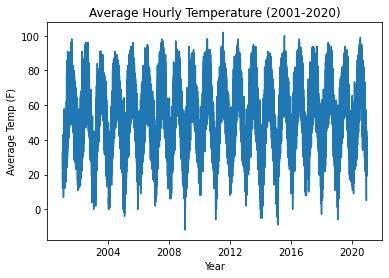

In [40]:
df_temps_avg_temp_col_name = "Average Temp (F)"
ax = sns.lineplot(data=df_temps, 
                  x=df_temps.index.values, 
                  y=df_temps_avg_temp_col_name)
ax.set_xlabel("Year")
ax.set_title("Average Hourly Temperature (2001-2020)");

#### 34) [P] Now, compute the mean of the hourly average temperature for each year plot this annual value. (HINT: The resample() method will again make this incredibly easy to do!)

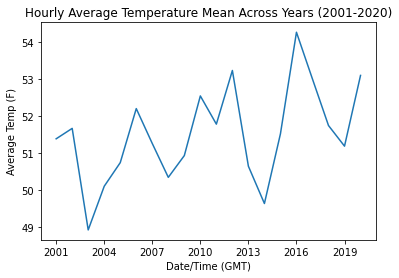

In [41]:
df_temps_mean_avg_temp_per_year = \
df_temps[df_temps_avg_temp_col_name].resample("Y").mean()

ax = sns.lineplot(x=df_temps_mean_avg_temp_per_year.index.year,
                  y=df_temps_mean_avg_temp_per_year.values)

ax.set_ylabel(df_temps_avg_temp_col_name)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) # year x axis labels
                                                                 # are integers
ax.set_title("Hourly Average Temperature Mean Across Years (2001-2020)");